In [1]:

import numpy as np
from numpy import *                         
import matplotlib.pylab as p
from mpl_toolkits.mplot3d import Axes3D 
from numba import jit, njit #libreria numba, me permite que el programa se ejecute más rápido. 
#---------------------------- Liberias -----------------------------------------

import math
import random #Liberia para generar numeros aleatorios
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing 
import multiprocessing as mp
from multiprocessing import Pool
from multiprocessing import Process, Lock
multiprocessing.cpu_count()
from time import perf_counter
import pandas as pd

269.921675528


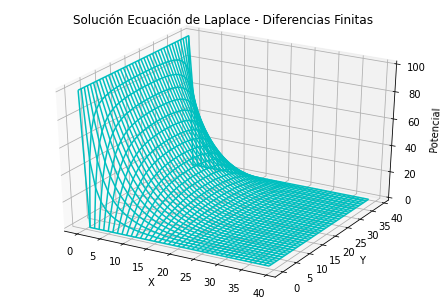

270.165909454


In [2]:
#-------------------------------------------- MÉTODO DE DIFERENCIAS FINITAS --------------------------------------------


N = 100  # iteraciones
V_2 = zeros((40,40)) # potencial V por el método de diferencias finitas.
Nx=40 # Tamaño. 

#--------------------------------------------- Condiciones de Frontera.  --------------------------------------------

for k in range(0, 40-1):                      
    V_2[k,0] = 100  # para j=0 V=100.
    
for n in range(N):                                  
    for i in range(1, Nx-1):                                                
        for j in range(1,Nx-1): # Diferencias finitas
            V_2[i,j] = (1/4)*(V_2[i+1,j]+V_2[i-1,j]+V_2[i,j+1]+V_2[i,j-1]) # Potencial por diferencias finitas. 
            
x = arange(0, 40,1) #Coordenada x, el cual es una rejilla de 40*40
y = arange(0, 40,1) # Coordenada Y
X,Y = p.meshgrid(x, y) 
tin=perf_counter()
print(tin)
fig = p.figure()                                 #Dibuja figura
ax = Axes3D(fig)                                              
ax.plot_wireframe(X, Y, V_2, color='c')  
ax.set_title('Solución Ecuación de Laplace - Diferencias Finitas')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potencial')
p.show()
tini1=perf_counter()
print(tini1)


In [3]:
#-------------------------------------------- MÉTODO DE MONTE CARLO. --------------------------------------------

#----------------------------------------- Condiciones iniciales -------------------------------------------

V=np.zeros((40,40),float) # potencial V por el método.

#-------------------------------------------- Programa ------------------------------------------------------

@njit #(parallel=True). ejecuta más rápido el programa. 
def Potencial(imax,jmax):
    np.random.seed(34)# Ya que utilizamos Numba.
    sum=0
    nrun=1000
    for k in range(nrun):
        i=imax
        j=jmax
        while(i<=40 and j<=40):
            r=np.random.rand() # Números aleatorios. 
            
            # A continuación se dan las condiciones de frontera para las problabilidades utilizadas por el 
            # método de diferencias finitas. 
            
            if (r>=0.0 and r<0.25): i=i+1 #Probabilidad para la posición i=i+1
            if (r>=0.25 and r<0.5): i=i-1 #Probabilidad para la posición i=i-1
            if (r>=0.5 and r<0.75): j=j-1 #Probabilidad para la posición j=j-1
            if (r>=0.75 and r<=1.0): j=j+1 #Probabilidad para la posición j=j+1


#----------------------------- Condiciones de frontera en el problema de Laplace. ----------------------------------------

            if (i==0.0):
                sum=sum+0.0
                break
        
            if (i==40):
                sum=sum+0.0
                break
    
            if (j==0.0): 
                sum=sum+0.0
                break
                
            if (j==40): 
                sum=sum+100
                break  

    return sum/nrun


for i in range (0,40):
    for j in range (0,40):
        V[i,j]=Potencial(i,j)
        
tin_2=perf_counter()
print(tin_2) 


291.281185568


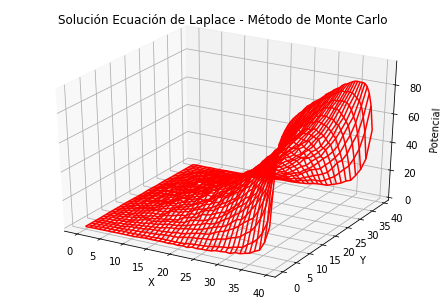

298.424390768


In [4]:
x=np.arange(0,40,1) # Coordenada x, el cual es una rejilla de 40*40
y=np.arange(0,40,1) # Coordenada y. 

X,Y=np.meshgrid(x,y)
fig=p.figure()
ax=Axes3D(fig)
ax.plot_wireframe(X,Y,V, color='r')
ax.set_title('Solución Ecuación de Laplace - Método de Monte Carlo')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potencial')
p.show()
tin2=perf_counter()
print(tin2)

In [5]:
#-------------------------------------------- MÉTODO DE MONTE CARLO. --------------------------------------------

#----------------------------------------- Condiciones iniciales -------------------------------------------

V1=np.zeros((40,40),float) # potencial V por el método.

#-------------------------------------------- Programa ------------------------------------------------------

@njit #(parallel=True). ejecuta más rápido el programa. 
def Potencial(imax,jmax):
    np.random.seed(34)# Ya que utilizamos Numba.
    sum=0
    nrun=1000
    for k in range(nrun):
        i=imax
        j=jmax
        while(i<=40 and j<=40):
            r=np.random.rand() # Números aleatorios. 
            
            # A continuación se dan las condiciones de frontera para las problabilidades utilizadas por el 
            # método de diferencias finitas. 
            
            if (r>=0.0 and r<0.25): i=i+1 #Probabilidad para la posición i=i+1
            if (r>=0.25 and r<0.5): i=i-1 #Probabilidad para la posición i=i-1
            if (r>=0.5 and r<0.75): j=j-1 #Probabilidad para la posición j=j-1
            if (r>=0.75 and r<=1.0): j=j+1 #Probabilidad para la posición j=j+1


#----------------------------- Condiciones de frontera en el problema de Laplace. ----------------------------------------

            if (i==0.0):
                sum=sum+0.0
                break
        
            if (i==40):
                sum=sum+0.0
                break
    
            if (j==0.0): 
                sum=sum+0.0
                break
                
            if (j==40): 
                sum=sum+100
                break  

    return sum/nrun

if __name__=='__main__':
    pool = mp.Pool(multiprocessing.cpu_count())
    data = [[pool.apply(Potencial, args=(i,j)) for i in range(0,40)] for j in range(0,40)]
    rsult=np.savetxt('file.dat', data)
        #V[i,j]=Potencial(i,j)
    y_1=np.loadtxt('file.dat')

    yy=pd.DataFrame(y_1) # Archivos de la energía.



    p.close()
    print(rsult)
    print(yy)
    
tfin=perf_counter()
print(tfin)
    

None
      0     1     2     3     4     5   ...    34    35    36    37    38    39
0    0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   0.0
1    0.0   0.0   0.2   0.2   0.3   0.3  ...   0.1   0.1   0.2   0.1   0.1   0.1
2    0.1   0.1   0.3   0.4   0.3   0.6  ...   0.4   0.1   0.2   0.1   0.2   0.1
3    0.1   0.2   0.4   0.4   0.5   0.5  ...   0.8   0.6   0.3   0.2   0.1   0.0
4    0.2   0.3   0.4   0.6   0.4   1.2  ...   1.3   1.1   0.6   0.3   0.2   0.2
5    0.2   0.3   0.5   0.7   1.1   1.3  ...   2.1   1.3   1.1   0.6   0.2   0.1
6    0.2   0.4   0.7   0.7   1.1   1.5  ...   2.1   1.8   1.6   0.9   0.3   0.1
7    0.3   0.7   0.9   1.2   1.6   2.1  ...   2.4   2.0   1.5   1.3   0.6   0.2
8    0.3   0.8   0.9   1.9   1.9   2.5  ...   2.8   2.2   1.9   1.3   1.1   0.3
9    0.3   0.6   1.2   1.9   2.3   2.7  ...   3.1   2.5   2.1   1.3   1.2   0.3
10   0.3   0.7   1.3   2.2   2.7   3.3  ...   3.7   3.2   2.2   1.5   1.0   0.4
11   0.4   0.7   1.5   2.3   3.0   

<function matplotlib.pyplot.show>

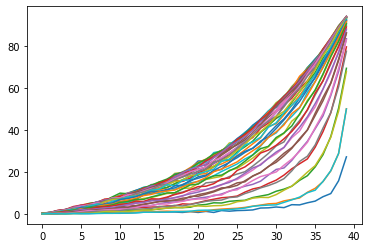

In [6]:
plt.plot(yy)
plt.show

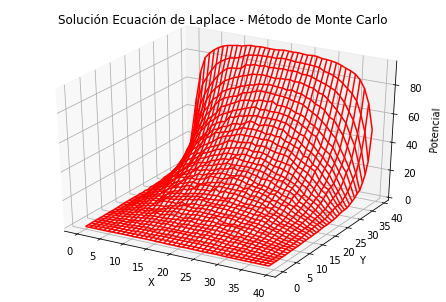

348.660953993


In [7]:
x=np.arange(0,40,1) # Coordenada x, el cual es una rejilla de 40*40
y=np.arange(0,40,1) # Coordenada y. 

X,Y=np.meshgrid(x,y)
fig=p.figure()
ax=Axes3D(fig)
ax.plot_wireframe(X,Y,yy, color='r')
ax.set_title('Solución Ecuación de Laplace - Método de Monte Carlo')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Potencial')
p.show()
tin2=perf_counter()
print(tin2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


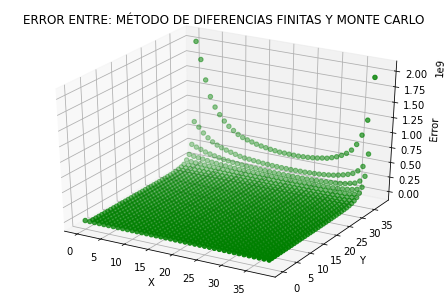

In [8]:
#------------------------------- ERROR entre: MÉTODO DE DIFERENCIAS FINITAS y MONTE CARLO--------------------------------


Err = abs(V_2-V)/(abs(V_2)/100000)  

fig = p.figure()                            
ax = Axes3D(fig)                                              
ax.scatter(Y, X, Err, color='g') 
ax.set_title('ERROR ENTRE: MÉTODO DE DIFERENCIAS FINITAS Y MONTE CARLO')
ax.set_xlabel('X')                                     
ax.set_ylabel('Y')
ax.set_zlabel('Error')
plt.savefig('Error.pdf')
p.show()

In [9]:
print(tfin-tin)

51.95706328
